In [576]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [577]:
# experiment = "02_Compare"
experiment = "05_Reveal"
# experiment = "08_SecureMean"
# experiment = "09_SecureMin"
data=[]
framworks =["MP-SPDZ","mp-slice"]

base = "./results/Deviation/"
for framework in framworks:
    path= base + framework + "/" + experiment+"/data/short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC" or framework=="mp-slice":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [578]:
import os

path = base
fl_paths = []
for framework in framworks:
    path_f= path+framework
    for root, dirs, files in os.walk(path_f):
        for dir in dirs:
            folder_path = os.path.join(root, dir)
            if root == path_f:
                fl_paths.append(folder_path)


In [579]:
import pandas as pd


In [580]:
fl_paths

['./results/Deviation/MP-SPDZ/05_Reveal',
 './results/Deviation/MP-SPDZ/08_SecureMean',
 './results/Deviation/MP-SPDZ/01_Multiplication',
 './results/Deviation/MP-SPDZ/15_BitAND',
 './results/Deviation/MP-SPDZ/10_PSI',
 './results/Deviation/MP-SPDZ/09_SecureMin',
 './results/Deviation/MP-SPDZ/06_LeNet',
 './results/Deviation/MP-SPDZ/04_LogReg',
 './results/Deviation/MP-SPDZ/16_Division',
 './results/Deviation/MP-SPDZ/12_VGG',
 './results/Deviation/MP-SPDZ/13_LeNet4Nodes',
 './results/Deviation/MP-SPDZ/07_Aes',
 './results/Deviation/MP-SPDZ/11_Auction',
 './results/Deviation/MP-SPDZ/14_PSI4nodes',
 './results/Deviation/MP-SPDZ/Preprocess',
 './results/Deviation/MP-SPDZ/02_Compare',
 './results/Deviation/MP-SPDZ/03_Share',
 './results/Deviation/mp-slice/05_Reveal',
 './results/Deviation/mp-slice/08_SecureMean',
 './results/Deviation/mp-slice/01_Multiplication',
 './results/Deviation/mp-slice/09_SecureMin',
 './results/Deviation/mp-slice/02_Compare']

In [581]:
fl_paths[-1].split("/")[-2]

'mp-slice'

In [582]:
runtime=0
for path in fl_paths:
    if path.split("/")[-2]=="MOTION" and path.split("/")[-1]=="15_BitAND":
        continue
    
    frame=pd.read_csv(path+"/data/short_results.csv" , header=0, sep=';', index_col=False, engine='python')
    frame['framework']=path.split("/")[-2]
    framework=path.split("/")[-2]
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC" or framework=="mp-slice":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor+10
    runtime+=frame['runtime_external(s)'].sum()+3*8*60

In [583]:
runtime/3600

85.90212475555555

In [584]:
bandwidth,label=rf.get_bandwidth_deviation(data)
latency,label=rf.get_latency_deviation(data)
packetdrop,label=rf.get_packetdrop_deviation(data)

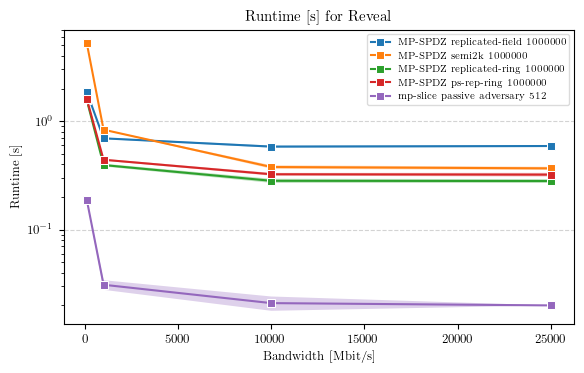

In [585]:
rf.plot_deviation(bandwidth,label,"test.png",experiment,"Bandwidth [Mbit/s]","Runtime [s]",True)

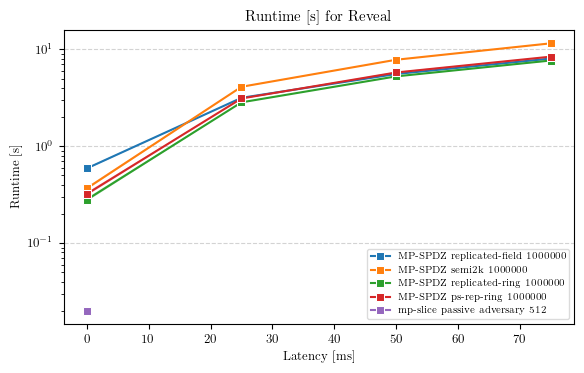

In [586]:
rf.plot_deviation(latency,label,"test.png",experiment,"Latency [ms]","Runtime [s]",True)

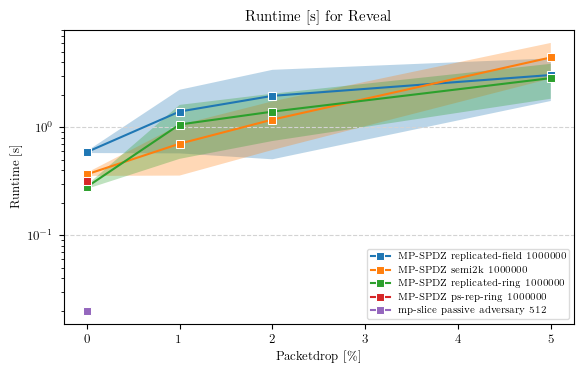

In [587]:
rf.plot_deviation(packetdrop,label,"test.png",experiment,"Packetdrop [\%]","Runtime [s]",True)

In [588]:
[df['mean'].iloc[0] for df in bandwidth]

[1.861, 5.242, 1.566, 1.6019999999999999, 0.1879896]

In [589]:
[df['mean'].iloc[0] for df in bandwidth]
[df['std'].iloc[0] for df in bandwidth]

[0.01370320319406299,
 0.02936362072739375,
 0.008432740427115719,
 0.007888106377466161,
 0.006319498207927587]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


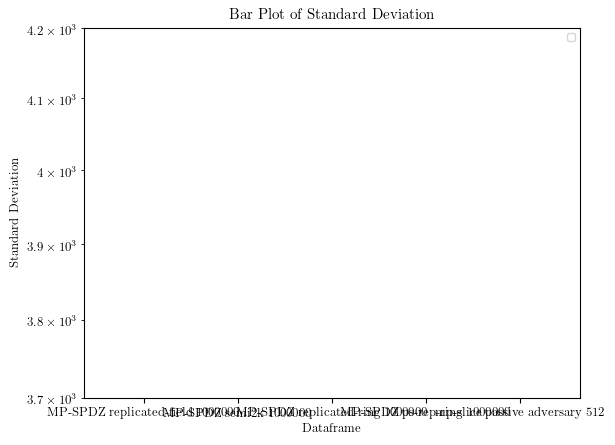

In [591]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the 'mean' and 'std' values separately
mean_values = [df['mean'].iloc[0] for df in bandwidth]
std_values = [df['std'].iloc[0] for df in bandwidth]

# Create a bar plot with 'mean' values as the height of the bars and 'std' values as standard deviation
fig, ax = plt.subplots()
ax.bar(label, mean_values,yerr=std_values,capsize=3)

plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel('Dataframe')
plt.ylabel('Standard Deviation')
plt.title('Bar Plot of Standard Deviation')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Show the plot
plt.show()
